In [1]:
#Part 1: Intro
#Part 2: SVM General Explanation
#Part 3: Computing the Hyperplane
#Part 4: Additional Math Resources
#Part 5: SVM with Sci Kit Learn
#Part 6: Additional Resources

In [1]:
#Supervised learning models with associated learning algorithims.
#Advantages
    #Effective in high dimensional spaces
    #Effective where num of dimensions > num of samples
    #Uses a subset of training points in the decision function
    #Versatile: different Kernel functions
#Disadvantages
    #If number of features is MUCH greater than samples, method won't perf well
    #SVMs don't directly provide probability estimates

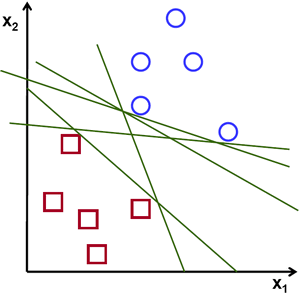

In [6]:
from IPython.display import Image
from IPython.display import YouTubeVideo
url = 'https://docs.opencv.org/2.4/_images/separating-lines.png'
Image(url)

In [4]:
#Where can we put a green line that seperates the two classes?
#Multiple ways of drawing the line, hyper planes(?) - What's optimal?

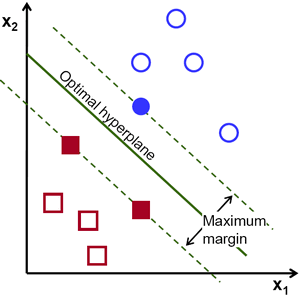

In [5]:
url2 = "https://docs.opencv.org/2.4/_images/optimal-hyperplane.png"
Image(url2)

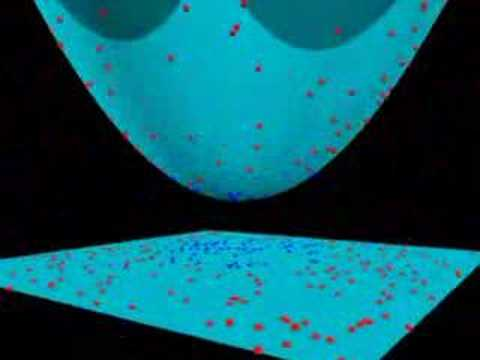

In [7]:
#Kernel Trick Visualization
YouTubeVideo('3liCbRZPrZA')

In [11]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from sklearn import datasets

In [13]:
iris = datasets.load_iris()

In [14]:
X = iris.data
Y = iris.target

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [39]:
model.fit(X_train,Y_train)

SVC()

In [40]:
from sklearn import metrics

In [41]:
predicted = model.predict(X_test)

expected = Y_test

In [43]:
#Can change test_size to 0.4 & random_state=3 to change accuracy score..
#Larger test size reduces accuracy.
#Reran the cells, went from 1.0 to 0.9210526
print(metrics.accuracy_score(expected,predicted))

0.9210526315789473


In [44]:
#Various kernel types we can use for classification
#Plot the boundaries of each kernel type
#Four different methods
    #Two linear models, a Gaussian Radial Basis Function & SVC w polynomial
    #They'll yield slightly different boundaries
#Linear SVC minimizes the squared hinge loss while SVC mini regular hinge loss
#Liear SVC uses 1vAll multiclass reduction method

In [45]:
from sklearn import svm

In [46]:
X = iris.data[:,:2]

In [47]:
Y = iris.target

In [49]:
#Regularization perameter
C = 1.0

In [50]:
#Just interested on how these SVMs would split the data into different classes
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [51]:
#Radial basis function is why gamma=0.7.
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [52]:
#Third Degree polynomial fit
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [55]:
lin_svc = svm.LinearSVC(C=C, max_iter=10000).fit(X,Y)

In [56]:
#Meshgrid method, numpy, construct plot.

In [57]:
h = 0.02

#x min set to minimum feature in column, minus one
x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

In [58]:
y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

In [59]:
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [60]:
titles = ['SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel']

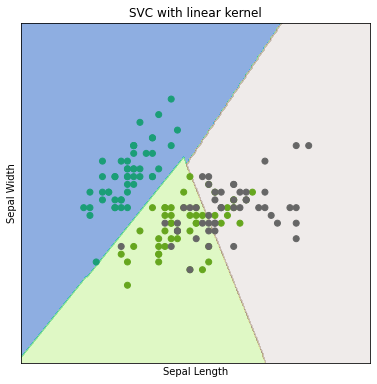

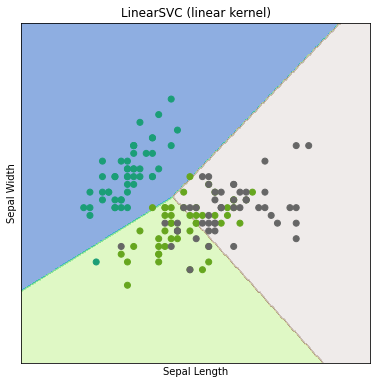

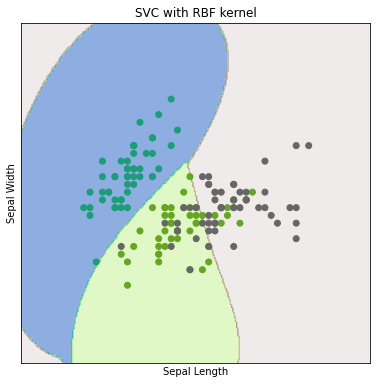

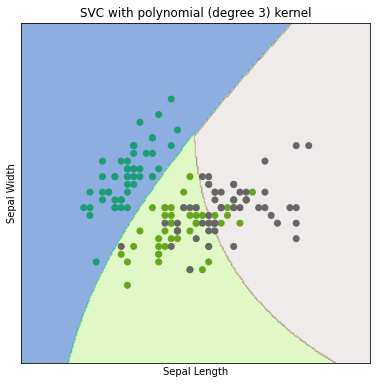

In [63]:
#for loop, go through each model, set it's decision as a subplot
#enumerate to setup counts

for i,clf, in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    #What do we want to do?
    #1st - plot decision boundary
        #Assign color to each point in the mesh..
    plt.figure(figsize=(15,15))
    #subplot position, 4 figures so 2,2, could do 4x1. Loc is Enum+1
    plt.subplot(2,2,i+1)
    #subplot spacing, width space and height space btween plots
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    #define Z as the prediction, pass transform meth of array
    #c_ transforms sliced objects into concat against second axis
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    #Let's put the result into a color plot. yay.
    Z = Z.reshape(xx.shape)
    #now contour plot f for fill
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5)
    #After contour, make scatter plot
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    #finally, labels and titles
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

In [ ]:
#That was tough.